In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize

import json
from pandas.io.json import json_normalize
from flatten_json import flatten

In [2]:
proposal = open('data/graphqlproposals.json')
votes = open('data/graphql_updated.json')
votes_data = json.load(votes)
proposal_data = json.load(proposal)

json_to_df(votes)

In [3]:
votes_data 

{'data': {'votes': [{'id': 'Qme74bpyAiWmap2Vjeg7RyUHAVbFg8jbH1nXYH4gDs7RDY',
    'voter': '0xe183013F51D2A4B280cc1ec595D153AAa781E45b',
    'created': 1622994432,
    'choice': 1,
    'space': {'id': 'gitcoindao.eth'},
    'proposal_id': 'QmaPNPYLCP2nJG5am8pwqJErEhzDMXUw5Z7DuuYjyrRG6p'},
   {'id': 'QmVJpCz7U9dYu9iKH2cCwyTWHQ9JB3B95a4kt4LB6edacZ',
    'voter': '0x9b01aDd622621d8145109715b996D182855BB450',
    'created': 1622994345,
    'choice': 1,
    'space': {'id': 'gitcoindao.eth'},
    'proposal_id': 'QmaPNPYLCP2nJG5am8pwqJErEhzDMXUw5Z7DuuYjyrRG6p'},
   {'id': 'QmU3ZCNk7sh4pZKPtUyebmUKmKELKRE9D2SJFnz83ioupx',
    'voter': '0x750e0CBae6e9E06Dd7f4592DB49bA4cdb462f7f0',
    'created': 1622994175,
    'choice': 1,
    'space': {'id': 'gitcoindao.eth'},
    'proposal_id': 'QmaPNPYLCP2nJG5am8pwqJErEhzDMXUw5Z7DuuYjyrRG6p'},
   {'id': 'QmSuXEqRXQPc5n5pp5FAaKC6KA4C2Sti1qSRGTbaa61C3w',
    'voter': '0x3c397BD1ec1127DAdA41C9b24b9Ff86f1d6A36Be',
    'created': 1622994126,
    'choice': 1,
    

In [4]:
proposal_data

{'data': {'proposals': [{'id': '0xc6309348f43ba77bb488d2d5f154db3264f86a890b500fa8286fe089c6ddc9a0',
    'title': 'Gitcoin Product Collective Workstream Proposal & Budget Request for Season 15',
    'body': 'This is an initial funding proposal for the Gitcoin Product Collective (GPC) Workstream requesting ratification as a structured workstream and budgetary funds for Season 15 (1 August 2022 through 31 October 2022). The full governance post can be found here: https://gov.gitcoin.co/t/s15-proposal-gitcoin-product-collective-workstream-proposal-budget-request\n\nThe GPC is seeking the following funding:\nSeason 15 Total Need: $983,429 (413,206 GTC)\n60 day reserves*: $462,085 (194,154 GTC)\nAmount Requested from Treasury $1,445,514 (607,360 GTC)\n*60 day reserves are calculated only against the contributor compensation and payroll related OpEx.\n\nNote: The GTC amounts above were adjusted based on the current market value at the time this proposal was moved to Snapshot. The vote will b

In [5]:
#Based on the prettified format, I can only pass the first level of nested keys.
votes_df = pd.json_normalize(votes_data['data']['votes'])
votes_df

,id,voter,created,choice,proposal_id,space.id
0,Qme74bpyAiWmap2Vjeg7RyUHAVbFg8jbH1nXYH4gDs7RDY,0xe183013F51D2A4B280cc1ec595D153AAa781E45b,1622994432,1,QmaPNPYLCP2nJG5am8pwqJErEhzDMXUw5Z7DuuYjyrRG6p,gitcoindao.eth
1,QmVJpCz7U9dYu9iKH2cCwyTWHQ9JB3B95a4kt4LB6edacZ,0x9b01aDd622621d8145109715b996D182855BB450,1622994345,1,QmaPNPYLCP2nJG5am8pwqJErEhzDMXUw5Z7DuuYjyrRG6p,gitcoindao.eth
2,QmU3ZCNk7sh4pZKPtUyebmUKmKELKRE9D2SJFnz83ioupx,0x750e0CBae6e9E06Dd7f4592DB49bA4cdb462f7f0,1622994175,1,QmaPNPYLCP2nJG5am8pwqJErEhzDMXUw5Z7DuuYjyrRG6p,gitcoindao.eth
3,QmSuXEqRXQPc5n5pp5FAaKC6KA4C2Sti1qSRGTbaa61C3w,0x3c397BD1ec1127DAdA41C9b24b9Ff86f1d6A36Be,1622994126,1,QmaPNPYLCP2nJG5am8pwqJErEhzDMXUw5Z7DuuYjyrRG6p,gitcoindao.eth
4,QmYgDcjKz3dv2pzmHEYZ3kFku7FZXmGKFjBTykvo9fiGgA,0xc034D4cdB67093Cb354724e83667832df36f4D5b,1622993881,1,QmaPNPYLCP2nJG5am8pwqJErEhzDMXUw5Z7DuuYjyrRG6p,gitcoindao.eth
...,...,...,...,...,...,...
995,QmQgziTjohvYaYFGREwuzJuPQzAuq2WXzQNqfneiSHTphM,0xFA89Ed30A7fdD9f1892298a413871287288A48c2,1622537376,1,QmaPNPYLCP2nJG5am8pwqJErEhzDMXUw5Z7DuuYjyrRG6p,gitcoindao.eth
996,QmSByY8kDiCmk8hghZJ9xgV1MvBq3KKM9rHPjQnaX9M2Me,0x5be10f3434bC1aC6C0A34f86Da39Ea0095392f21,1622537139,2,QmaPNPYLCP2nJG5am8pwqJErEhzDMXUw5Z7DuuYjyrRG6p,gitcoindao.eth
997,QmQDAFaQ2zXbMNrSurw9YMQk9HCBMGLGEtucbkRacvppkf,0x3120Af515FB2197B92d6E7665301c232Cd545e40,1622536898,1,QmaPNPYLCP2nJG5am8pwqJErEhzDMXUw5Z7DuuYjyrRG6p,gitcoindao.eth
998,QmYSZ1HRVuProfaqQuRZqeSqiJMfN1hL5mxGfC5ZVZwj57,0x354640486E3e8e9F151158197e4667Daa2AD0Bdc,1622536525,1,QmaPNPYLCP2nJG5am8pwqJErEhzDMXUw5Z7DuuYjyrRG6p,gitcoindao.eth


In [6]:
proposal_df = pd.json_normalize(proposal_data['data']['proposals'])
proposal_df

,id,title,body,choices,start,end,snapshot,state,author,space.id,space.name
0,0xc6309348f43ba77bb488d2d5f154db3264f86a890b50...,Gitcoin Product Collective Workstream Proposal...,This is an initial funding proposal for the Gi...,"[For, Against, Abstain]",1657923221,1658559300,15154315,closed,0xDaeB6E6b4Fd8b283DE327142914F936228b96BC7,gitcoindao.eth,Gitcoin
1,0x7827fdf2b3aa1569e3e9a078af1f1171682f649f2b12...,Ratify the Results of Grants Round 14 and Form...,We ask our Community Stewards to ratify the GR...,"[FOR, AGAINST]",1657166387,1657598400,15093119,closed,0x894Aa5F1E45454677A8560ddE3B45Cb5C427Ef92,gitcoindao.eth,Gitcoin
2,0x0eb45cfd31ddd2701af3d74ce38a9e87292fe42a6b40...,Gitcoin $3 Million Treasury Diversification,**Authors**: @schlabach & @HelloShreyas from [...,"[FOR, AGAINST]",1657065545,1657497600,15085611,closed,0x10D6d2e343281D388291A3e02f3293AaEdA67178,gitcoindao.eth,Gitcoin
3,0x7125530a7046b90c59f02bbf9b4b4690b37a13cc4575...,"Ratify Foundation changes, DAO gov updates and...",tl;dr - there are three core categories of cha...,"[Yes - Ratify the changes, No - Do not ratify ...",1655316000,1655748000,14968731,closed,0xc2E2B715d9e302947Ec7e312fd2384b5a1296099,gitcoindao.eth,Gitcoin
4,0x79e8ca9c2f8af4b606cbba35a478e9fc2080d48d1fd8...,Gitcoin // Radicle Public Goods Alliance,Forum post: https://gov.gitcoin.co/t/gitcoin-r...,"[FOR, AGAINST, ABSTAIN]",1655308740,1655740500,14968318,closed,0x10D6d2e343281D388291A3e02f3293AaEdA67178,gitcoindao.eth,Gitcoin
...,...,...,...,...,...,...,...,...,...,...,...
61,QmaNNqMPXYMbuBgu8Q5SuLPD2GDoAnrsDMN361cjefKPYP,Proposal: Transfer SACKS/ETH LP from Multisig ...,Continued from [this thread](https://gov.gitco...,"[Yes, transfer LP to GTC timelock, No, leave L...",1622509200,1622941200,12545400,closed,0x8d07D225a769b7Af3A923481E1FdF49180e6A265,gitcoindao.eth,Gitcoin
62,QmUoBpLsMSZ7Aq1UEzvEyGyTdR8Reeb8qQFGUhcQLqcQMM,AKITA tokens - A path forward,This Proposal is a result of discussion on the...,"[Sell 10% of AKITA, Stream 90%, Use AKITA in M...",1622498400,1622930400,12544762,closed,0xcb42Ac441fCade3935243Ea118701f39AA004486,gitcoindao.eth,Gitcoin
63,QmeGrN1bxYyt3RGqLkJL6v8XLpz3W2FyYSmpZxAiCxhF2m,Should we liquidate the AKITA for ETH?,I propose that we liquidate the Akita for ETH ...,"[Yes, No, Abstain]",1622286000,1622890800,12530738,closed,0x86d3ee9ff0983Bc33b93cc8983371a500f873446,gitcoindao.eth,Gitcoin
64,QmSXwJCKpC7fnWqdvjPdMMMgA1Z8q5NbJXU5XT4CVftJsv,Convert the AKITA tokens to ETH?,Are you in favor of converting the AKITA token...,"[Yes 👍, No 👎]",1622278800,1622883600,12528811,closed,0xC9DC3C79EaA2028Fb1A75196fb130C7B3c4b0DCA,gitcoindao.eth,Gitcoin


## Data Cleaning

In [7]:
def cleaning_data(proposal_df):
    words = stopwords.words("english")
    proposal_df['body_cleaned']= proposal_df['body'].apply(lambda x: word_tokenize(x))
    proposal_df['body_cleaned']= proposal_df['body_cleaned'].apply(lambda x: [i for i in x if i not in words])
    proposal_df['body_cleaned']= proposal_df['body_cleaned'].apply(lambda x: " ".join([i for i in x if i not in string.punctuation]))
    return proposal_df

def vectorized_data(proposal_df):
    vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
    #final_features = vectorizer.fit_transform(part_df['comment_text_cleaned']).toarray()
    return vectorizer

In [8]:
cleaned_proposal_df = cleaning_data(proposal_df)
cleaned_proposal_df

,id,title,body,choices,start,end,snapshot,state,author,space.id,space.name,body_cleaned
0,0xc6309348f43ba77bb488d2d5f154db3264f86a890b50...,Gitcoin Product Collective Workstream Proposal...,This is an initial funding proposal for the Gi...,"[For, Against, Abstain]",1657923221,1658559300,15154315,closed,0xDaeB6E6b4Fd8b283DE327142914F936228b96BC7,gitcoindao.eth,Gitcoin,This initial funding proposal Gitcoin Product ...
1,0x7827fdf2b3aa1569e3e9a078af1f1171682f649f2b12...,Ratify the Results of Grants Round 14 and Form...,We ask our Community Stewards to ratify the GR...,"[FOR, AGAINST]",1657166387,1657598400,15093119,closed,0x894Aa5F1E45454677A8560ddE3B45Cb5C427Ef92,gitcoindao.eth,Gitcoin,We ask Community Stewards ratify GR14 payout a...
2,0x0eb45cfd31ddd2701af3d74ce38a9e87292fe42a6b40...,Gitcoin $3 Million Treasury Diversification,**Authors**: @schlabach & @HelloShreyas from [...,"[FOR, AGAINST]",1657065545,1657497600,15085611,closed,0x10D6d2e343281D388291A3e02f3293AaEdA67178,gitcoindao.eth,Gitcoin,Authors schlabach HelloShreyas Llama https //l...
3,0x7125530a7046b90c59f02bbf9b4b4690b37a13cc4575...,"Ratify Foundation changes, DAO gov updates and...",tl;dr - there are three core categories of cha...,"[Yes - Ratify the changes, No - Do not ratify ...",1655316000,1655748000,14968731,closed,0xc2E2B715d9e302947Ec7e312fd2384b5a1296099,gitcoindao.eth,Gitcoin,tl dr three core categories changes seek ratif...
4,0x79e8ca9c2f8af4b606cbba35a478e9fc2080d48d1fd8...,Gitcoin // Radicle Public Goods Alliance,Forum post: https://gov.gitcoin.co/t/gitcoin-r...,"[FOR, AGAINST, ABSTAIN]",1655308740,1655740500,14968318,closed,0x10D6d2e343281D388291A3e02f3293AaEdA67178,gitcoindao.eth,Gitcoin,Forum post https //gov.gitcoin.co/t/gitcoin-ra...
...,...,...,...,...,...,...,...,...,...,...,...,...
61,QmaNNqMPXYMbuBgu8Q5SuLPD2GDoAnrsDMN361cjefKPYP,Proposal: Transfer SACKS/ETH LP from Multisig ...,Continued from [this thread](https://gov.gitco...,"[Yes, transfer LP to GTC timelock, No, leave L...",1622509200,1622941200,12545400,closed,0x8d07D225a769b7Af3A923481E1FdF49180e6A265,gitcoindao.eth,Gitcoin,Continued thread https //gov.gitcoin.co/t/rfc-...
62,QmUoBpLsMSZ7Aq1UEzvEyGyTdR8Reeb8qQFGUhcQLqcQMM,AKITA tokens - A path forward,This Proposal is a result of discussion on the...,"[Sell 10% of AKITA, Stream 90%, Use AKITA in M...",1622498400,1622930400,12544762,closed,0xcb42Ac441fCade3935243Ea118701f39AA004486,gitcoindao.eth,Gitcoin,This Proposal result discussion Gitcoin Forum ...
63,QmeGrN1bxYyt3RGqLkJL6v8XLpz3W2FyYSmpZxAiCxhF2m,Should we liquidate the AKITA for ETH?,I propose that we liquidate the Akita for ETH ...,"[Yes, No, Abstain]",1622286000,1622890800,12530738,closed,0x86d3ee9ff0983Bc33b93cc8983371a500f873446,gitcoindao.eth,Gitcoin,I propose liquidate Akita ETH look towards DeF...
64,QmSXwJCKpC7fnWqdvjPdMMMgA1Z8q5NbJXU5XT4CVftJsv,Convert the AKITA tokens to ETH?,Are you in favor of converting the AKITA token...,"[Yes 👍, No 👎]",1622278800,1622883600,12528811,closed,0xC9DC3C79EaA2028Fb1A75196fb130C7B3c4b0DCA,gitcoindao.eth,Gitcoin,Are favor converting AKITA tokens ETH using mo...


In [9]:
#https://stackoverflow.com/questions/53996794/vectorizing-pandas-column

## Clustering model

In [10]:
vectorizer = TfidfVectorizer()
proposal_vectorized = vectorizer.fit_transform(cleaned_proposal_df['body_cleaned'])

In [11]:
proposal_vectorized

<66x2877 sparse matrix of type '<class 'numpy.float64'>'
	with 7193 stored elements in Compressed Sparse Row format>

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss_vals = []
# silhouette_scores = []

for k in range(2,9):
    kmeans_model = KMeans(n_clusters = k, random_state = 0).fit(proposal_vectorized)
    wcss = kmeans_model.inertia_
    wcss_vals.append(wcss)    
    print('WCSS for k =', k, ':', round(wcss, 4))

WCSS for k = 2 : 56.678
WCSS for k = 3 : 54.4561
WCSS for k = 4 : 52.6159
WCSS for k = 5 : 50.723
WCSS for k = 6 : 49.8679
WCSS for k = 7 : 48.3016
WCSS for k = 8 : 46.9405


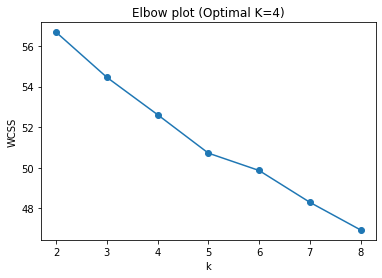

In [13]:
import matplotlib.pyplot as plt

plt.title("Elbow plot (Optimal K=4)")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.plot(range(2,9), wcss_vals, '-o')
plt.show()

In [14]:
NUM_CLUSTERS = 5
kmeans = KMeans(n_clusters = NUM_CLUSTERS, random_state = 0)
cluster_labels = kmeans.fit_predict(proposal_vectorized)

In [15]:
cluster_labels

array([4, 3, 4, 4, 0, 4, 2, 4, 4, 0, 4, 4, 0, 4, 4, 0, 3, 0, 4, 4, 2, 4,
       4, 0, 4, 0, 0, 3, 0, 4, 0, 0, 2, 4, 4, 4, 0, 0, 0, 3, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 3, 2, 1, 2, 1, 4, 4, 1, 4, 2, 4, 4, 1, 1, 1, 1, 0])

In [16]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(proposal_vectorized.todense()).groupby(cluster_labels).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
community,goods,https,public,gtc,dao,budget,workstream,proposal,gitcoin

Cluster 1
proposal,com,liquidate,github,lp,lbp,tokens,gitcoin,eth,akita

Cluster 2
proposal,categories,grants,gitcoin,proposed,allocations,round,option,pool,matching

Cluster 3
defense,you,detection,keyholders,request,community,fraud,payout,results,ratify

Cluster 4
reserves,14,we,request,proposal,fdd,council,budget,season,gtc


In [17]:
# map clusters to appropriate labels 
cluster_map = {0: "general", 1: "liquidity pool", 2: "allocation", 3: "fraud detection and ratification", 4: "budget and reserves"}
# apply mapping
cleaned_proposal_df['cluster'] = cluster_labels
cleaned_proposal_df = cleaned_proposal_df.replace({'cluster': cluster_map})
cleaned_proposal_df.tail(20)

,id,title,body,choices,start,end,snapshot,state,author,space.id,space.name,body_cleaned,cluster
46,QmQWucgbue8uemNHXTDKvvEhRxfEcoB6B6Ci51TANkKaGU,Public Goods Workstream Allocation,"Through this proposal, the Public Goods Fundin...","[Yes - Allocate 45,000 GTC, No - Don't allocat...",1627693200,1628298000,12929463,closed,0x66b1De0f14a0ce971F7f248415063D44CAF19398,gitcoindao.eth,Gitcoin,Through proposal Public Goods Funding workstre...,general
47,Qmf8du3yfvYvFsXRDQHfUMvafFBAMWb2ujC6KjWQZ8Mqky,oneGTC: A $GTC Backed Economy,"This proposal is the first of it's kind, aimed...","[Yes, I support oneGTC, No, I don't support on...",1627304400,1628038800,12890875,closed,0x66b1De0f14a0ce971F7f248415063D44CAF19398,gitcoindao.eth,Gitcoin,This proposal first 's kind aimed treasury opt...,general
48,QmY7yvzid9KM8Jn5MrAXe853wRmk5tjNSzW2DR82q8Z5RJ,GTC Allocation to GR10 Grantees,This proposal looks to ratify the allocation o...,"[Option 1 - Allocate 20K GTC, Option 2 - Do no...",1626739200,1627257600,12866769,closed,0xcb42Ac441fCade3935243Ea118701f39AA004486,gitcoindao.eth,Gitcoin,This proposal looks ratify allocation GTC Comm...,allocation
49,QmdLNbbE4CHPwyhfsqjj1qzst2NFjXS6Ax3moqWwgVWjQa,[Proposal] Ratify the Results of Grants Round ...,We ask our Community Stewards to ratify the GR...,"[FOR, AGAINST]",1626298200,1626730200,12827445,closed,0x5BA02f4Ff6Af1d9d2Af8774D10fD32Eb57d4E2E6,gitcoindao.eth,Gitcoin,We ask Community Stewards ratify GR10 payout a...,fraud detection and ratification
50,QmZTskr6yb4tSF7Jnnvd5a2YsuJJBDveEv4hbK6QJM83SB,GR10 Matching Pool: Use Gitcoin to build Gitco...,This proposal seeks to add a $50k DAI “side ro...,"[Yes $50k to fund GTCDAO building, No, no soup...",1623790800,1623938400,12641178,closed,0x34aA3F359A9D614239015126635CE7732c18fDF3,gitcoindao.eth,Gitcoin,This proposal seeks add 50k DAI “ side round ”...,allocation
51,QmQe6fHVDsvE91ShNagvFojetuWHu6xKn7izk46Dg2cQmK,[Execution Phase] How do we best go forward to...,After some conversations with the Akita commun...,"[Option 1, Option 2, Option 3]",1623409200,1623668400,12613361,closed,0x86d3ee9ff0983Bc33b93cc8983371a500f873446,gitcoindao.eth,Gitcoin,After conversations Akita community become cle...,liquidity pool
52,QmRbuBUX7vtNhYwYqYG3Jd4LqaRXVM8qDgjNojGEAzJdnH,GR10 Matching Pool Breakdown,"This Snapshot vote is proposed by 🔥_🔥, looking...","[No categories, one bucket, Proposed breakdown...",1623283200,1623715200,12603769,closed,0xcb42Ac441fCade3935243Ea118701f39AA004486,gitcoindao.eth,Gitcoin,This Snapshot vote proposed 🔥_🔥 looking finali...,allocation
53,Qmd5Lmq1Z1iDuZkvcVDGdrwttUyUfdUeACHSMxFxYx3PbM,Claim GTC by ETH address without logging in gi...,There are many support tickets on github.com f...,"[For, Against]",1621915200,1624593600,12587257,closed,0xdaFa879f659Bba79011130cfA6537Ab3E1ABdD97,gitcoindao.eth,Gitcoin,There many support tickets github.com account ...,liquidity pool
54,QmeLMJpaVF4vMth4EkmJ7qnSriPgff9SRhkR5mznfFk57x,Is pineapple a legitimate pizza topping?,"Now that GitcoinDAO has been formed, we can fi...","[Pineapple Pizza for the win, pineapple ngmi]",1623013140,1623617940,12580976,closed,0x7BfAf4C59aA4F011672b8e77789e1eb41abd654d,gitcoindao.eth,Gitcoin,Now GitcoinDAO formed finally lay eternal deba...,budget and reserves
55,Qmf6hFhnn3yhMYE7omvEoXTEKjzYuKeAzxK7X2t5MkvCF2,Future Salaries (an Ethereum salaries widget) ...,"Owocki is a fan of quadratic funding, but it h...","[Yes, add a page with widget, No]",1622883600,1625389200,12576409,closed,0x722cE03C15670c313f9596544CDB582c19f810e2,gitcoindao.eth,Gitcoin,Owocki fan quadratic funding big deficiencies ...,budget and reserves


In [18]:
merged_votes_and_proposals = pd.merge(cleaned_proposal_df, votes_df, left_on = 'id', right_on = 'proposal_id', how = 'inner') # we used the default how='inner'
#merged_votes_and_proposals.tail(10)

<AxesSubplot:>

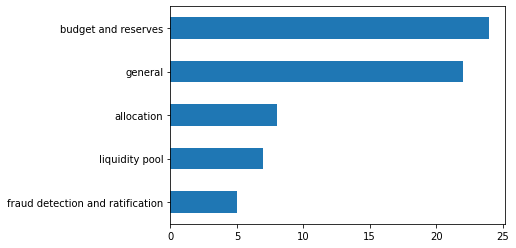

In [19]:
cleaned_proposal_df.cluster.value_counts().sort_values().plot(kind = 'barh')